In [1]:
import sys
import os
import matplotlib.pyplot as plt
import cv2

import numpy as np

# Add the src directory to the path. TEMPORARY FIX
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from src.data_processing.dataset_loader import CoastData
from src.data_processing.dataset_preprocessor import DatasetPreprocessor

In [2]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/raw/SCLabels_v1.0.0/"))

# Load the data, all the different stations
data = CoastData(data_path, name="cies")

filtered_data = data.get_images_and_masks() 

filtered_data = data.split_data()

# Get the first image and mask
image_path = filtered_data['train']['images'][0]
mask_path = filtered_data['train']['masks'][0]

print("Image:", image_path)
print("Mask:", mask_path)

CoastData: cies - 430 images
Coast: cies, Total size: 430
Image: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/images/1667995920.Wed.Nov.09_13_12_00.CET.2022.cies.image.jpg
Mask: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/raw/SCLabels_v1.0.0/masks/1667995920.Wed.Nov.09_13_12_00.CET.2022.cies.mask.png


Image shape: (213, 901, 3)
Mask shape: (213, 901)
New image shape: (193, 376, 3)
New mask shape: (193, 376)
New mask unique values: [0 1 2]


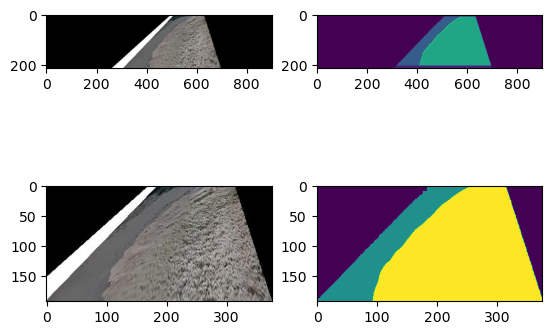

In [ ]:
dataset_preprocessor = DatasetPreprocessor()

image = dataset_preprocessor.load_image(image_path)
mask = dataset_preprocessor.load_mask(mask_path)

print("Image shape:", image.shape)
print("Mask shape:", mask.shape)

mapping = {
    0: 0,    # Background → Class 0
    25: 1,   # Not classified → Class 1
    75: 2,   # Land → Class 2
    150: 3,  # Sea → Class 3
    255: 4   # Shoreline → Class 4
}

# If we want only 3 classes:
mapping = {
    0: 0,    # Background → Class 0
    25: 0,   # Not classified → Class 1
    75: 1,   # Land → Class 2
    150: 2,  # Sea → Class 3
    255: 1   # Shoreline → Class 4
}

new_image, new_mask = dataset_preprocessor.process_image(image, mask, mask_mapping=mapping)

print("New image shape:", new_image.shape)
print("New mask shape:", new_mask.shape)

print("New mask unique values:", np.unique(new_mask))

fig, ax = plt.subplots(2, 2)


ax[0][0].imshow(image)
ax[0][1].imshow(mask)

ax[1][0].imshow(new_image)
ax[1][1].imshow(new_mask)

plt.show()

In [4]:
# Preprocess all the dataset
new_data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed/"))

dataset_preprocessor = DatasetPreprocessor()

mapping = {
    0: 0,    # Background → Class 0
    25: 0,   # Not classified → Class 1
    75: 1,   # Land → Class 2
    150: 2,  # Sea → Class 3
    255: 1   # Shoreline → Class 4
}

dataset_preprocessor.preprocess(dataset_path=data_path, dataset_output_path=new_data_path, mask_mapping=mapping)

### New dataset

CoastData: global - 1717 images
Coast: agrelo, Total size: 244
Coast: arenaldentem, Total size: 40
Coast: cadiz, Total size: 946
Coast: cies, Total size: 430
Coast: samarador, Total size: 57
Image: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed/images/1555342200.Mon.Apr.15_16_30_00.CET.2019.agrelo.image.jpg
Mask: /Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed/masks/1555342200.Mon.Apr.15_16_30_00.CET.2019.agrelo.mask.png


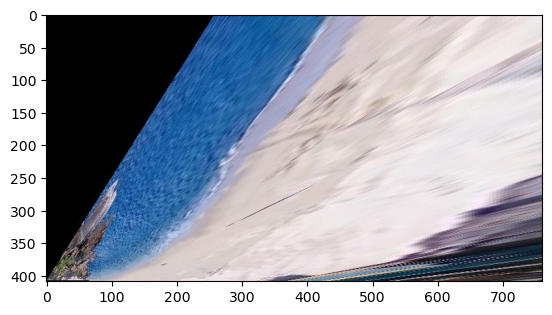

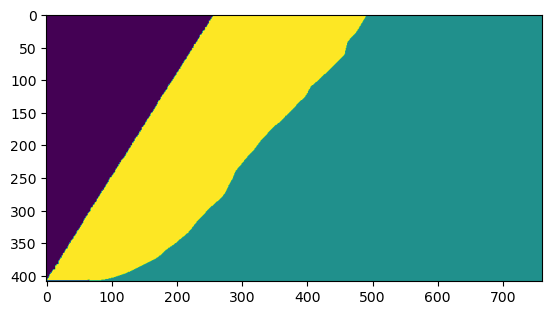

In [ ]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed/"))

# Load the data, all the different stations
data = CoastData(data_path)

filtered_data = data.get_images_and_masks() 

filtered_data = data.split_data()

# Get the first image and mask
image_path = filtered_data['train']['images'][0]
mask_path = filtered_data['train']['masks'][0]

print("Image:", image_path)
print("Mask:", mask_path)

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img)
plt.show()

plt.imshow(mask)
plt.show()